In [1]:
import pandas as pd
import networkx as nx
import csv

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define an empty list to store data
rows = []

# Open the CSV file and read the data
with open('citations.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        # Add the row read to the data list
        rows.append(row)


print(type(rows))
print(len(rows))

<class 'list'>
16242


In [3]:
# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add edges to the graph based on the data in rows
print(f'Number of cases citing other cases = {len(rows)}')
for row in rows:
    initial_case = int(row[0])
    cited_cases = list(map(int, row[1:]))
    
    # Add an edge from caso_iniziale to each caso_citato
    for cited_case in cited_cases:
        G.add_edge(initial_case, cited_case)

# Now the graph G contains the cases and the citations between them
# You can use NetworkX functions to analyze the graph, for example:nodes
print(f'Number of nodes = {len(G.nodes)}')
print(f'Number of edges = {len(G.edges)}')

Number of cases citing other cases = 16242
Number of nodes = 17522
Number of edges = 139345


In [4]:
node_in_degrees = dict(G.in_degree())  #For each case the number of cases citing it
node_out_degrees = dict(G.out_degree()) #For each case the number of cases it cites

#Example with case 15501
print("In-degree of node 15501:", node_in_degrees[15501])
print("Out-degree of node 15501:", node_out_degrees[15501])

most_cited_node = max(node_in_degrees, key=node_in_degrees.get)
most_citing_node = max(node_out_degrees, key=node_out_degrees.get)


print(f"Most cited case is {most_cited_node} with {node_in_degrees[most_cited_node]} citations")
print(f"Most citing case is {most_citing_node} with {node_out_degrees[most_citing_node]} citations")

In-degree of node 15501: 3
Out-degree of node 15501: 4
Most cited case is 1588533 with 250 citations
Most citing case is 77177 with 78 citations


In [5]:


print(f'Average in degree: {np.mean([d for _, d in G.in_degree()])}')
print(f'Average out degree: {np.mean([d for _, d in G.out_degree()])}')

Average in degree: 7.952573907088232
Average out degree: 7.952573907088232


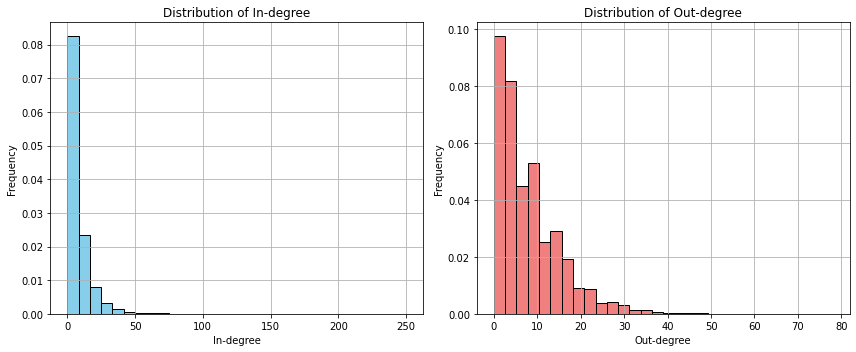

In [6]:
import matplotlib.pyplot as plt

# Calculates node degree distributions.
degree_values_in = [degree for node, degree in G.in_degree()]
degree_values_out = [degree for node, degree in G.out_degree()]

# Create a grid of subplots with 1 row and 2 columns
plt.figure(figsize=(12, 5))  
plt.subplot(1, 2, 1)  
plt.hist(degree_values_in, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.title("Distribution of In-degree")
plt.grid(True)

plt.subplot(1, 2, 2)  
plt.hist(degree_values_out, bins=30, density=True, color='lightcoral', edgecolor='black')
plt.xlabel("Out-degree")
plt.ylabel("Frequency")
plt.title("Distribution of Out-degree")
plt.grid(True)

plt.tight_layout()  
plt.show()


In [7]:
import networkx as nx

clustering_coefficient = nx.average_clustering(G)

print("Clustering coefficient of the graph:", clustering_coefficient)


Clustering coefficient of the graph: 0.07486489675051623


In [8]:
#Visualizing the graph
display=True
if display: 
    pos = nx.spring_layout(G, iterations=15, seed=1721)
    fig, ax = plt.subplots(figsize=(15, 9))
    plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
    ax.axis("off")
    nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

# Strongly connected components 
A directed graph is strongly connected if and only if every vertex in the graph is reachable from every other vertex.

In [9]:
#Test directed graph for strong connectivity.
print(f'Strong connectivity: {nx.is_strongly_connected(G)}')

print(f'Number of strongly connected components in graph: {nx.number_strongly_connected_components(G)}')

Strong connectivity: False
Number of strongly connected components in graph: 17484


In [10]:
largest = max(nx.strongly_connected_components(G), key=len)
print(largest)

{929138, 2550915, 929260, 929235}


# Undirected graph

In [11]:
# Create a graph using NetworkX
G1 = nx.Graph()

# Add edges to the graph based on the data in rows
print(f'Number of cases citing other cases = {len(rows)}')
for row in rows:
    initial_case = int(row[0])
    cited_cases = list(map(int, row[1:]))
    
    # Add an edge from caso_iniziale to each caso_citato
    for cited_case in cited_cases:
        G1.add_edge(initial_case, cited_case)

# Now the graph G contains the cases and the citations between them
# You can use NetworkX functions to analyze the graph, for example:nodes
print(f'Number of nodes = {len(G1.nodes)}')
print(f'Number of edges = {len(G1.edges)}')

Number of cases citing other cases = 16242
Number of nodes = 17522
Number of edges = 139311


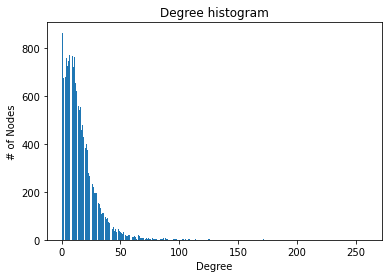

In [12]:
degree_sequence = sorted((d for n, d in G1.degree()), reverse=True)
dmax = max(degree_sequence)


plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")
plt.show()

In [13]:
print(f'Number of nodes: {G1.number_of_nodes()}')
print(f'Number of egdes: {G1.number_of_edges()}')
print(f'Average degree for each node: {np.mean([d for _, d in G1.degree()])}')

Number of nodes: 17522
Number of egdes: 139311
Average degree for each node: 15.901266978655405


In [14]:
# #Visualizing the graph
# display=True
# if display: 
#     pos = nx.spring_layout(G1, iterations=15, seed=1721)
#     fig, ax = plt.subplots(figsize=(15, 9))
#     plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
#     ax.axis("off")
#     nx.draw_networkx(G1, pos=pos, ax=ax, **plot_options)

In [15]:
#Test graph for strong connectivity.
print(f'Connectivity test: {nx.is_connected(G1)}')
#How many nodes are in the connected components?
total_nodes_in_all_components = 0
# Calculates the connected components of the undirected graph.
connected_components = list(nx.algorithms.components.connected_components(G1))
print(f"Number of connected components: {len(connected_components)}")
for i, component in enumerate(connected_components, 1):
    total_nodes_in_component = len(component)
    total_nodes_in_all_components += total_nodes_in_component
    print(f"Connected component {i} (Total nodes: {total_nodes_in_component}): {component}")

print(f"Total number of nodes in all connected components: {total_nodes_in_all_components}")

Connectivity test: False
Number of connected components: 20
Connected component 1 (Total nodes: 17480): {3670016, 2850825, 5373962, 3670029, 3670038, 11272215, 5341210, 11272224, 3670050, 4676265, 3670057, 11272234, 1563104, 11272243, 3670070, 5341239, 3670073, 11272249, 2719808, 3670086, 11272263, 3670094, 11272276, 2850902, 3670107, 5341276, 2833127, 11272285, 3670113, 11272289, 5374055, 11272302, 3670127, 2719855, 3670129, 5341308, 3670143, 2850952, 11272331, 3670159, 11272337, 3784021, 5374101, 5341341, 11272349, 4676290, 3670182, 1573039, 1573041, 715095, 1573043, 11272371, 11272373, 1573045, 1573047, 1573049, 5341369, 1573050, 1573052, 1573053, 3670206, 1573055, 1573057, 1573058, 5374147, 1573060, 1573062, 1573063, 1573064, 1573065, 11272390, 2719946, 1573068, 1573069, 1573070, 1573067, 1573072, 3670224, 1573073, 11272401, 1573076, 1573077, 1573078, 1573074, 1573079, 1573080, 1573082, 1573083, 11272409, 1573085, 1573084, 1573086, 11272412, 1573088, 1573089, 1573090, 1573092, 1573

In [16]:
#Example of subgraph
sorted(nx.connected_components(G1), key=len, reverse=True)[2]

{3282907, 3283776, 8300959}

In [ ]:
#display subgraphs 
display=True
if display: 
    for subgraph in S:
        _pos = nx.spring_layout(subgraph)
        plt.figure(figsize=(8, 8))
        nx.draw_networkx_edges(subgraph, _pos, alpha=0.3, edge_color="k")
        node_color_list_c = [nc for _, nc in subgraph.nodes(data="node_color")]
        nx.draw_networkx_nodes(subgraph, _pos, node_color=node_color_list_c)
        nx.draw_networkx_labels(subgraph, _pos, font_size=14)
        plt.axis("off")
        plt.title("One of the subgraphs.")
        plt.show()

Clustering coefficient distribution

In [ ]:
print("Average clustering coefficient.")
print(f'Directed Graph G: {nx.average_clustering(G)}')
print(f'Graph G1: {nx.average_clustering(G1)}')

Average clustering coefficient.
Directed Graph G: 0.07486489675051623
Graph G1: 0.14960399482884765


Text(0, 0.5, 'Counts')

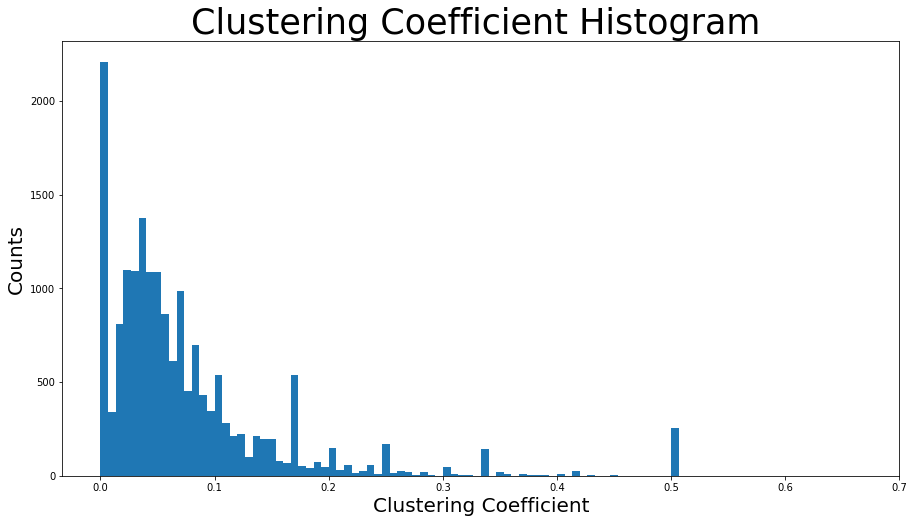

In [20]:
#Display of clustering coefficient distribution
plt.figure(figsize=(15, 8))
plt.hist(nx.clustering(G).values(), bins=100)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})